In [26]:
import numpy as np
import math
import matplotlib.pyplot as plt

L_p = np.array([2.13336814e+35, 1.13369761e+35, 2.33097518e+35, 1.13332024e+34,
       5.98133924e+34, 8.18257210e+34, 1.73097018e+35, 3.24324377e+34,
       1.73097018e+35, 1.18335288e+34, 1.78642665e+35, 2.34174926e+34,
       1.09450593e+34, 1.68941463e+36, 1.24665226e+35, 6.93572362e+34,
       1.45722728e+35, 4.59941243e+34, 2.34302449e+35, 1.71472117e+34,
       1.11513351e+35, 4.86624761e+34, 1.07487886e+35, 2.54841509e+34,
       2.83789752e+34, 2.26804336e+35, 4.82140057e+34, 1.23868121e+34,
       3.98034463e+33, 1.17219436e+34, 4.15212544e+32, 7.23783865e+34,
       2.74984673e+34, 1.45018806e+34, 3.52426220e+34, 5.21193301e+33,
       2.02640817e+34, 3.50357719e+33, 4.40213012e+34, 1.87352002e+34,
       7.90624394e+33, 4.75457273e+33, 1.64159139e+34, 3.40313381e+33,
       9.23177394e+33, 2.04900039e+34, 5.92380816e+34, 4.41464007e+34,
       1.29684380e+34, 1.68849400e+35, 2.43651278e+35, 2.79508932e+34,
       4.49174581e+34, 1.03549551e+35, 2.75959649e+32, 4.51577622e+33,
       2.64305786e+33, 5.27654375e+32, 3.54700997e+32, 3.27600381e+34,
       4.20429263e+33, 4.10960200e+32])

z = np.array([0.48, 0.4 , 0.79, 0.17, 0.23, 0.29, 0.35, 0.22, 0.35, 0.06, 0.49,
       0.1 , 0.14, 0.56, 0.31, 0.34, 0.38, 0.25, 0.51, 0.11, 0.37, 0.3 ,
       0.37, 0.08, 0.2 , 0.3 , 0.34, 0.3 , 0.57, 0.95, 0.19, 0.28, 0.72,
       0.14, 0.76, 0.56, 0.89, 0.43, 1.3 , 0.74, 0.35, 0.69, 0.59, 0.44,
       0.57, 0.49, 1.2 , 1.5 , 0.8 , 2.1 , 1.57, 0.19, 2.  , 1.6 , 0.13,
       0.29, 0.42, 0.21, 0.16, 1.08, 0.43, 0.21])

d_L = np.array([ 2.72,  2.21,  5.03,  0.8 ,  1.15,  1.52,  1.89,  1.11,  1.89,
        0.29,  2.76,  0.47,  0.66,  3.32,  1.6 ,  1.82,  2.06,  1.29,
        2.97,  0.52,  2.  ,  1.57,  2.03,  0.38,  0.99,  1.55,  1.81,
        1.57,  3.33,  6.26,  0.92,  1.42,  4.49,  0.67,  4.76,  3.3 ,
        5.82,  2.42,  9.25,  4.6 ,  1.86,  4.25,  3.5 ,  2.46,  3.32,
        2.79,  8.41, 11.09,  5.08, 16.8 , 11.73,  0.92, 15.82, 12.01,
        0.62,  1.49,  2.35,  1.05,  0.77,  7.4 ,  2.42,  1.07])

In [27]:
def g_new(z, k): #The improved g-function, which transforms luminosities
    Z = z+1
    Z_c = 3.5
    return Z**k/(1+Z/Z_c)**k

def L_lim1(F_lim, z_i, d_Li, g=g_new, k=0): #finds the limiting luminosity using flux, luminosity distance, and g
    return (F_lim*1e-19)*4*math.pi*(d_Li*3.08567758e25)**2/g(z_i, k)

def new_L(L, z, k=0, g=g_new):
    return [L[i]/g(z[i], k) for i in range(len(L))]

def sort_by_1(*args, reverse=False):
    thing = zip(*sorted(zip(*args), reverse=reverse))
    return [list(thang) for thang in thing]

In [28]:
ASKAP = (slice(0,27), 'ASKAP', 14.8, '#1f77b4')
PARKES = (slice(27,54), 'Parkes', 0.15, '#ff7f0e')
NEW_PARKES = (slice(27,54), 'Parkes', 0.30, '#ff7f0e')
NN_PARKES = (slice(27,54), 'Parkes', 0.31, '#ff7f0e')
CHIME = (slice(54,62), 'CHIME', 0.30, '#2ca02c')
ALL = (slice(0,62), 'All FRBs', 0.30, '#1f77b4')

In [43]:
def sigma_z(L, z, d_L, k=0, func=L_lim1, g=g_new, TELESCOPE=ALL): #z0 being the z of interest
    
    tel, telname, F_LIM, color = TELESCOPE
    
    L = new_L(L, z, k=k)
    z, L, d_L = sort_by_1(z[tel], L[tel], d_L[tel])
    
    fig, ax = plt.subplots()
    ax.scatter(z, L)
    ax.set_yscale('log')
    ax.set_xscale('log')
    
    zs_actual = []
    m = []
    for i in range(len(L)):
        num = 0
        
        if(L[i] < func(F_LIM, z[i], d_L[i], g=g, k=k)): #skip all those under limit
            print(z[i])
            continue
        
        #if above limit, add to list of indices
        zs_actual.append(z[i])
        
        for j in range(0, i): #since sorted by now, only j < i has z_j < z_i
            if(L[j] >= func(F_LIM, z[i], d_L[i], g=g) and z[j] <= z[i]): #associated set requirements
                num += 1
        
        m.append(num+1) #includes itself?
    
    sigma = []
    prod = 1
    for j in range(len(m)):
        prod *= (1 + 1/m[j])
        sigma.append(prod)
    
    return sigma, zs_actual

0.69
0.95
1.5
2.0
0.69
0.95
1.5
2.0
0.69
0.95
1.5
2.0


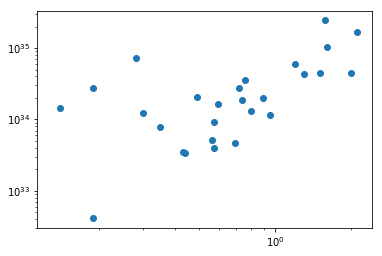

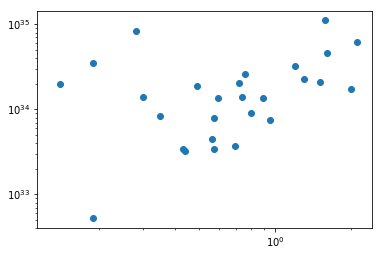

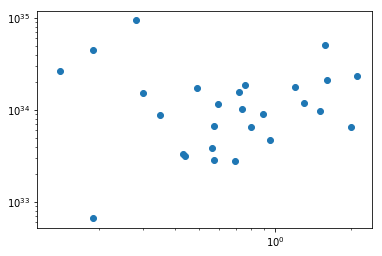

In [45]:
sigma0, z_0 = sigma_z(L_p, z, d_L, k=0, TELESCOPE=NEW_PARKES)
sigma2, z_2 = sigma_z(L_p, z, d_L, k=2, TELESCOPE=NEW_PARKES)
sigma4, z_4 = sigma_z(L_p, z, d_L, k=4, TELESCOPE=NEW_PARKES)

In [32]:
rawL = L_p[27:54]
rawz = z[27:54]
rawdL = d_L[27:54]

rawL = np.delete(rawL, [14,2,25])
rawz = np.delete(rawz, [14,2,25])
rawdL = np.delete(rawdL, [14,2,25])

def rawLF(L_p, z, d_L):
    z_, L_p_, d_L_ = sort_by_1(z, L_p, d_L)
    N = [i for i in range(1, len(z_)+1)] # 1 to N inclusive
    return z_, N

z_, N = rawLF(rawL, rawz, rawdL)

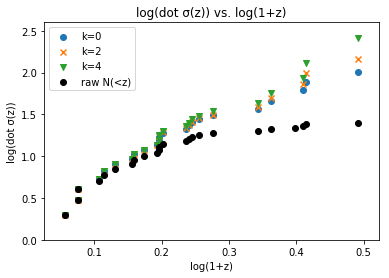

In [33]:
fig, ax = plt.subplots()
ax.scatter(np.log10(1+np.array(z_0)), np.log10(sigma0), label='k=0')
ax.scatter(np.log10(1+np.array(z_2)), np.log10(sigma2), label='k=2', marker='x')
ax.scatter(np.log10(1+np.array(z_4)), np.log10(sigma4), label='k=4', marker='v')
#plt.xlim([0, 0.6])
plt.ylim([0, 2.6])
plt.title(f'log(dot σ(z)) vs. log(1+z)')
plt.xlabel('log(1+z)')
plt.ylabel('log(dot σ(z))')

ax.scatter(np.log10(1+np.array(z_)), np.log10(np.array(N)+1), label='raw N(<z)', color='black')

#plt.ylabel('log N(<z)')
#plt.xlabel('log (1+z)')
#plt.title('log N(<z) vs. log(1+z)')

ax.legend()

#plt.savefig('dotsigma.png', dpi=300)
plt.show()
